In [1]:
import pickle

from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_fscore_support

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
SEEDS = [0,1,2]
CASES = ["plaintext", "amr_residual", "dep_residual"]

df_format_string = "results/indomain_results_{split}_{dataset}_seed-{seed}_{case}.csv"

def get_dataset_performance(dataset, split="test", return_precision_recall=True):
    sample_train_df = pd.read_csv(df_format_string.format(dataset=dataset, split="train", seed=0, case="plaintext"))
    label_frequencies = dict(sample_train_df["labels"].value_counts())

    results_dicts = []

    for case in CASES:
        for seed in SEEDS:
            results_dict = {"case": case, "seed": seed}
            df_filename = df_format_string.format(dataset=dataset, split=split, seed=seed, case=case)
            try:
                results_df = pd.read_csv(df_filename)
            except FileNotFoundError:
                print(f"Error with {df_filename}")
                continue
            labels = sorted(results_df["labels"].unique())
            p, r, f, _ = precision_recall_fscore_support(results_df["labels"], results_df["predictions"])
            for label, label_p, label_r, label_f in zip(labels, p, r, f):
                if return_precision_recall:
                    results_dict[f"{label}_precision"] = label_p
                    results_dict[f"{label}_recall"] = label_r
                results_dict[f"{label}_f1"] = label_f

            results_dicts.append(results_dict)

    results_df = pd.DataFrame(results_dicts)
    return results_df, label_frequencies

mscorpus_df, mscorpus_label_freq = get_dataset_performance("mscorpus", return_precision_recall=False)
risec_df, risec_label_freq = get_dataset_performance("risec", return_precision_recall=False)
efgc_df, efgc_label_freq = get_dataset_performance("japflow", return_precision_recall=False)


Error with results/indomain_results_test_japflow_seed-1_amr_residual.csv


In [4]:
with open("dataset_gini_atomic.pkl", "rb") as f:
    dataset_gini_atomic = pickle.load(f)

with open("dataset_gini_unigram.pkl", "rb") as f:
    dataset_gini_unigram = pickle.load(f)

In [5]:
msc_grouped = mscorpus_df.groupby("case").aggregate(["mean", "std"])
msc_grouped

seed      Apparatus_Of_f1           Condition_Of_f1            \
             mean  std            mean       std            mean       std   
case                                                                         
amr_residual  1.0  1.0        0.964789  0.013084        0.989332  0.000015   
dep_residual  1.0  1.0        0.963232  0.005599        0.992897  0.000010   
plaintext     1.0  1.0        0.956628  0.013887        0.990113  0.001827   

             Coref_Of_f1           Information_Of_f1            \
                    mean       std              mean       std   
case                                                             
amr_residual    0.897340  0.006389          0.980066  0.002209   
dep_residual    0.908126  0.025698          0.981170  0.004126   
plaintext       0.910835  0.007025          0.983251  0.001514   

             Next_Operation_f1           Number_Of_f1            \
                          mean       std         mean       std   
case                                                              
amr_residual          0.985754  0.001634     0.998523  0.000737   
dep_residual          0.989658  0.000457     0.998518  0.001962   
plaintext             0.985238  0.001458     0.999754  0.000427   

             Participant_Material_f1           Recipe_Precursor_f1            \
                                mean       std                mean       std   
case                                                                           
amr_residual                0.775068  0.005522            0.691323  0.027472   
dep_residual                0.782875  0.010429            0.718960  0.024743   
plaintext                   0.765370  0.014564            0.712793  0.005201   

             Recipe_Target_f1           Solvent_Material_f1            \
                         mean       std                mean       std   
case                                                                    
amr_residual         0.704381  0.055482            0.689621  0.011971   
dep_residual         0.704271  0.048595            0.688672  0.032228   
plaintext            0.694372  0.058635            0.630528  0.035589   

             Type_Of_f1            
                   mean       std  
case                               
amr_residual   0.984455  0.015626  
dep_residual   1.000000  0.000000  
plaintext      1.000000  0.000000

In [17]:
msc_diff = msc_grouped.apply(lambda row: row[:, "mean"] - msc_grouped.loc["plaintext"][:, "mean"], axis=1) * 100
msc_diff

,seed,Apparatus_Of_f1,Condition_Of_f1,Coref_Of_f1,Information_Of_f1,Next_Operation_f1,Number_Of_f1,Participant_Material_f1,Recipe_Precursor_f1,Recipe_Target_f1,Solvent_Material_f1,Type_Of_f1
case,,,,,,,,,,,,
amr_residual,0.0,0.816017,-0.078050,-1.349447,-0.318477,0.051621,-0.123038,0.969868,-2.147045,1.000871,5.909315,-1.554487
dep_residual,0.0,0.660393,0.278383,-0.270876,-0.208132,0.442094,-0.123548,1.750482,0.616666,0.989907,5.814384,0.000000
plaintext,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
efgc_grouped = efgc_df.groupby("case").aggregate(["mean", "std"])
efgc_grouped

seed             a-eq_f1            agent_f1             dest_f1  \
             mean       std      mean       std      mean       std      mean   
case                                                                            
amr_residual  1.0  1.414214  0.835266  0.012981  0.804580  0.006477  0.827660   
dep_residual  1.0  1.000000  0.863929  0.028203  0.798371  0.035033  0.822737   
plaintext     1.0  1.000000  0.849214  0.035250  0.807383  0.011658  0.835613   

                       f-comp_f1             f-eq_f1           f-part-of_f1  \
                   std      mean       std      mean       std         mean   
case                                                                          
amr_residual  0.001820  0.605392  0.031196  0.840758  0.027746     0.811520   
dep_residual  0.004665  0.666169  0.059511  0.864985  0.003279     0.828393   
plaintext     0.008483  0.674899  0.061355  0.850397  0.022146     0.806905   

                        f-set_f1           other-mod_f1           t-comp_f1  \
                   std      mean       std         mean       std      mean   
case                                                                          
amr_residual  0.022721  0.944444  0.078567     0.917358  0.009146  0.759085   
dep_residual  0.011538  0.925926  0.064150     0.907514  0.001712  0.754172   
plaintext     0.025957  1.000000  0.000000     0.902620  0.005204  0.778901   

                         t-eq_f1           t-part-of_f1             targ_f1  \
                   std      mean       std         mean       std      mean   
case                                                                          
amr_residual  0.001294  0.896371  0.014560     0.821201  0.009031  0.932597   
dep_residual  0.044686  0.881501  0.043589     0.814980  0.095670  0.928167   
plaintext     0.015772  0.891966  0.018068     0.809239  0.032617  0.929750   

                         v-tm_f1            
                   std      mean       std  
case                                        
amr_residual  0.000345  0.885909  0.013006  
dep_residual  0.001573  0.935502  0.007759  
plaintext     0.004454  0.916754  0.017763

In [9]:
efgc_diff = efgc_grouped.apply(lambda row: row[:, "mean"] - efgc_grouped.loc["plaintext"][:, "mean"], axis=1) * 100
efgc_diff

,seed,a-eq_f1,agent_f1,dest_f1,f-comp_f1,f-eq_f1,f-part-of_f1,f-set_f1,other-mod_f1,t-comp_f1,t-eq_f1,t-part-of_f1,targ_f1,v-tm_f1
case,,,,,,,,,,,,,,
amr_residual,0.0,-1.394799,-0.280242,-0.795265,-6.950726,-0.963915,0.461535,-5.555556,1.473766,-1.98159,0.440550,1.196116,0.284708,-3.084587
dep_residual,0.0,1.471546,-0.901162,-1.287612,-0.872992,1.458856,2.148760,-7.407407,0.489344,-2.47293,-1.046509,0.574026,-0.158342,1.874780
plaintext,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [10]:
risec_grouped = risec_df.groupby("case").aggregate(["mean", "std"])
risec_grouped

seed      ArgM_INT_f1           ArgM_LOC_f1            \
             mean  std        mean       std        mean       std   
case                                                                 
amr_residual  1.0  1.0    0.768691  0.031582    0.918437  0.001529   
dep_residual  1.0  1.0    0.708950  0.149035    0.919878  0.007345   
plaintext     1.0  1.0    0.716273  0.040586    0.927642  0.004106   

             ArgM_MNR_f1           ArgM_PRP_f1           ArgM_SIM_f1  \
                    mean       std        mean       std        mean   
case                                                                   
amr_residual    0.939999  0.006320    0.909585  0.015633    0.845553   
dep_residual    0.936906  0.009652    0.901652  0.011104    0.884966   
plaintext       0.941118  0.015798    0.905686  0.005897    0.857985   

                       ArgM_TMP_f1           Arg_DIR_f1           Arg_GOL_f1  \
                   std        mean       std       mean       std       mean   
case                                                                           
amr_residual  0.039602    0.986752  0.003129   0.897605  0.042857   0.855731   
dep_residual  0.047508    0.990877  0.001216   0.912156  0.023851   0.850996   
plaintext     0.054870    0.990865  0.001205   0.905401  0.020656   0.846633   

                       Arg_PAG_f1          Arg_PPT_f1           Arg_PRD_f1  \
                   std       mean      std       mean       std       mean   
case                                                                         
amr_residual  0.007309   0.140741  0.12239   0.977886  0.000942   0.872162   
dep_residual  0.023605   0.000000  0.00000   0.975219  0.002570   0.905820   
plaintext     0.017693   0.133333  0.11547   0.974989  0.000823   0.897812   

                        
                   std  
case                    
amr_residual  0.028971  
dep_residual  0.014663  
plaintext     0.028533

In [20]:
risec_diff = risec_grouped.apply(lambda row: row[:, "mean"] - risec_grouped.loc["plaintext"][:, "mean"], axis=1) * 100
risec_diff 

,seed,ArgM_INT_f1,ArgM_LOC_f1,ArgM_MNR_f1,ArgM_PRP_f1,ArgM_SIM_f1,ArgM_TMP_f1,Arg_DIR_f1,Arg_GOL_f1,Arg_PAG_f1,Arg_PPT_f1,Arg_PRD_f1
case,,,,,,,,,,,,
amr_residual,0.0,5.241829,-0.920470,-0.111881,0.389844,-1.243201,-0.411378,-0.779555,0.909735,0.740741,0.289696,-2.564961
dep_residual,0.0,-0.732270,-0.776373,-0.421190,-0.403389,2.698122,0.001182,0.675518,0.436255,-13.333333,0.022979,0.800801
plaintext,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

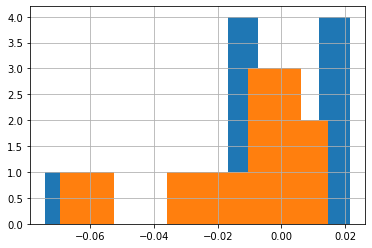

In [12]:
transpose_risec_f1s =  efgc_df.groupby("case").mean().drop(columns="seed").T

(transpose_risec_f1s["dep_residual"] - transpose_risec_f1s["plaintext"]).hist(bins=10)

(transpose_risec_f1s["amr_residual"] - transpose_risec_f1s["plaintext"]).hist(bins=10)

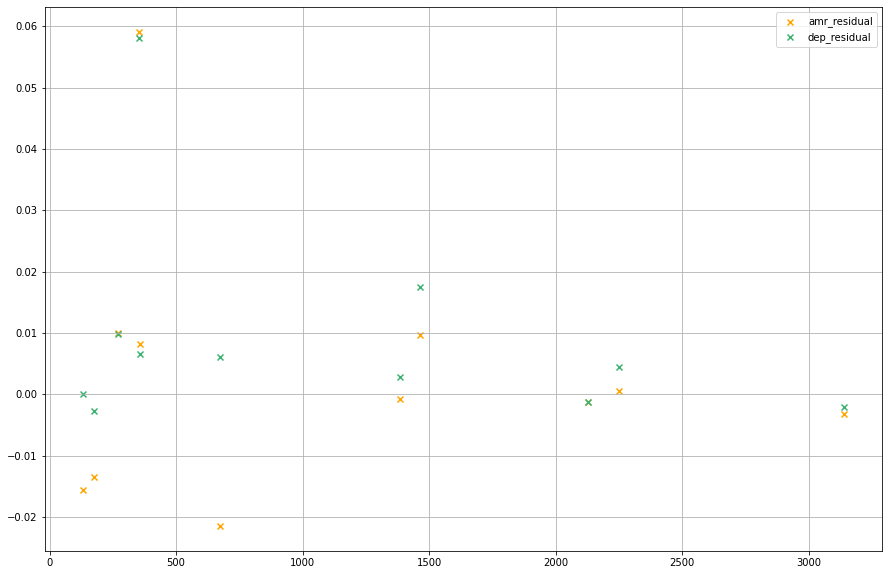

In [13]:
case_to_color = {
    "amr_residual": "orange",
    "dep_residual": "mediumseagreen",
    "plaintext": "dodgerblue"

}

def plot_frequency_vs_f1(dataset_name, results_df, label_frequencies):
    f1_df = results_df.groupby("case").mean().drop(columns="seed").T
    fig, ax = plt.subplots(figsize=(15,10))
    ax.grid()

    for case in ["amr_residual", "dep_residual"]:
        data  = [(label_frequency, f1_df.at[f"{label}_f1", case] - f1_df.at[f"{label}_f1", "plaintext"]) for label, label_frequency in label_frequencies.items()]
        ax.scatter(*zip(*data), color=case_to_color[case], marker="x", label=case)

    ax.legend()


plot_frequency_vs_f1("mscorpus", mscorpus_df, mscorpus_label_freq)


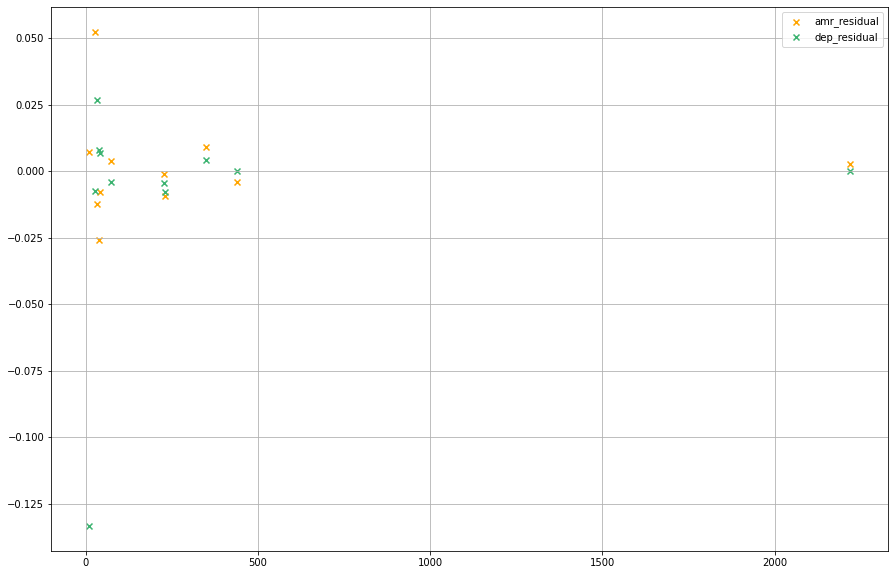

In [14]:
plot_frequency_vs_f1("risec", risec_df, risec_label_freq)

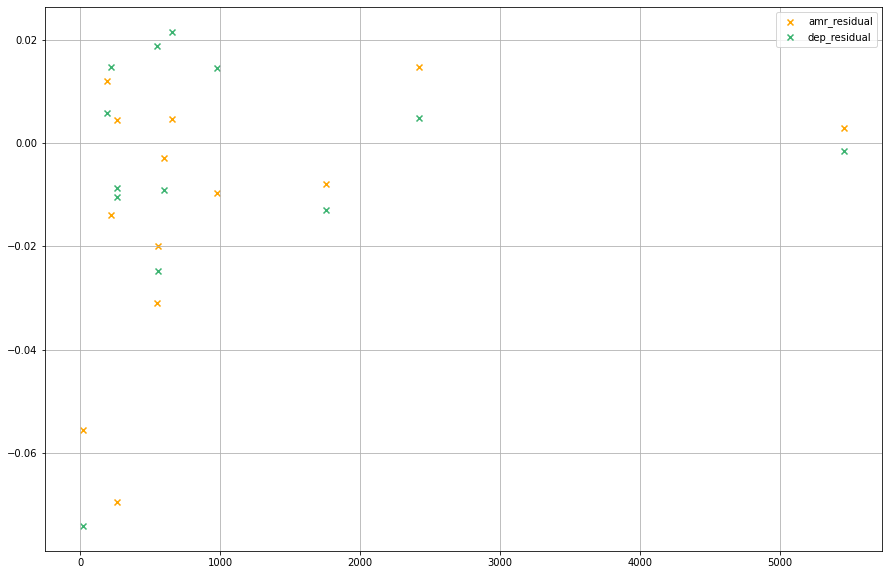

In [15]:
plot_frequency_vs_f1("efgc", efgc_df, efgc_label_freq)